# Accuracy plots

In this notebook we plot the training history after running *four_fold_worker.py*

In [1]:
import numpy as np
import os as os
import json
import matplotlib.pyplot as plt
import ast
import seaborn as sns
import pandas as pd
sns.set_style("darkgrid")

## Classification

We start with plots predicting a single hodge number (h11 and h31).

In [2]:
folder = 'results'
exp = 'class'
h = ['$h^{(1,1)}$-', '$h^{(2,1)}$-', '$h^{(3,1)}$-', '$h^{(2,2)}$-']
t_data = ['10', '30', '50', '80']

In [3]:
string_cla_hist = {}
string_cla_bohb = {}
for i, hi in enumerate(h):
    sfolder = os.path.join(folder, exp+str(i))
    for t in t_data:
        try:
            with open(os.path.join(sfolder, t, 'history.json'), 'r') as f:
                string_cla_hist[hi+t] = json.loads(f.readlines()[0][1:-1].replace('\'', '\"'))
                string_cla_hist[hi+t]['budget'] = np.arange(len(string_cla_hist[hi+t]['accuracy']))*(int(t)/80)
            with open(os.path.join(sfolder, t, 'class.json'), 'r') as f:
                string_cla_bohb[hi+t] = json.loads(f.readlines()[0])
        except Exception:
            print(Exception)
            print(os.path.join(sfolder, t, 'history.json'))
            pass

make a pandas dataframe

In [4]:
experiments = []
test_results = []
for i, key in enumerate(string_cla_hist):
    print(key)
    new_df = pd.DataFrame(string_cla_hist[key])
    new_df['model']= [key for _ in range(len(new_df))]
    new_df['Hodge']= [key[:-3] for _ in range(len(new_df))]
    new_df['train_ratio']= [int(key[-2:]) for _ in range(len(new_df))]
    experiments.append(new_df)
    test_df = pd.DataFrame(string_cla_bohb[key]['info']['best_info'], index=[i])
    test_df['Hodge']= key[:-3]
    test_df['train_ratio']= int(key[-2:])
    test_results.append(test_df)
hist_data = pd.concat(experiments) 
test_data = pd.concat(test_results) 

$h^{(1,1)}$-10
$h^{(1,1)}$-30
$h^{(1,1)}$-50
$h^{(1,1)}$-80
$h^{(2,1)}$-10
$h^{(2,1)}$-30
$h^{(2,1)}$-50
$h^{(2,1)}$-80
$h^{(3,1)}$-10
$h^{(3,1)}$-30
$h^{(3,1)}$-50
$h^{(3,1)}$-80
$h^{(2,2)}$-10
$h^{(2,2)}$-30
$h^{(2,2)}$-50
$h^{(2,2)}$-80


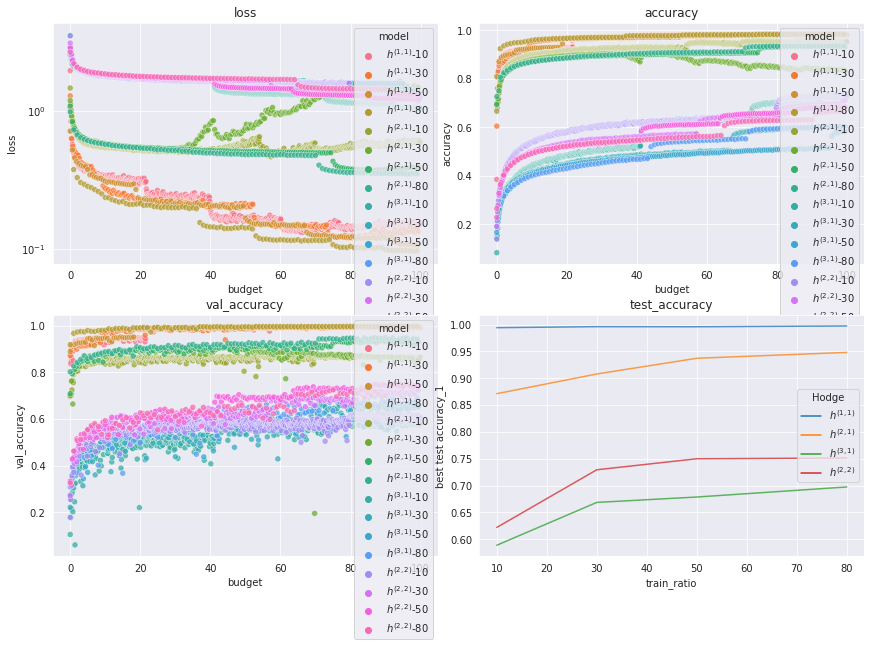

In [5]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(12,8))
fig.tight_layout(h_pad=3)
ax1.set_title("loss")
ax1.set_yscale("log")
sns.scatterplot(x='budget', y='loss', data=hist_data, alpha=0.75, ax=ax1, hue="model")

ax2.set_title("accuracy")
sns.scatterplot(x='budget', y='accuracy', data=hist_data, alpha=0.75, ax=ax2, hue="model")

ax3.set_title("val_accuracy")
sns.scatterplot(x='budget', y='val_accuracy', data=hist_data, alpha=0.75, ax=ax3, hue="model")

ax4.set_title("test_accuracy")
sns.lineplot(x='train_ratio', y='best test accuracy_1', data=test_data, alpha=0.75, ax=ax4, hue="Hodge")

plt.savefig('classification_plots.pdf')

In [6]:
hist_data2 = hist_data.copy(deep=True)
hist_data2['budget'] = round(hist_data2['budget'])

In [7]:
np.max(hist_data2['loss']), np.min(hist_data2['loss'])

(3.5211846828460693, 0.0959319993853569)

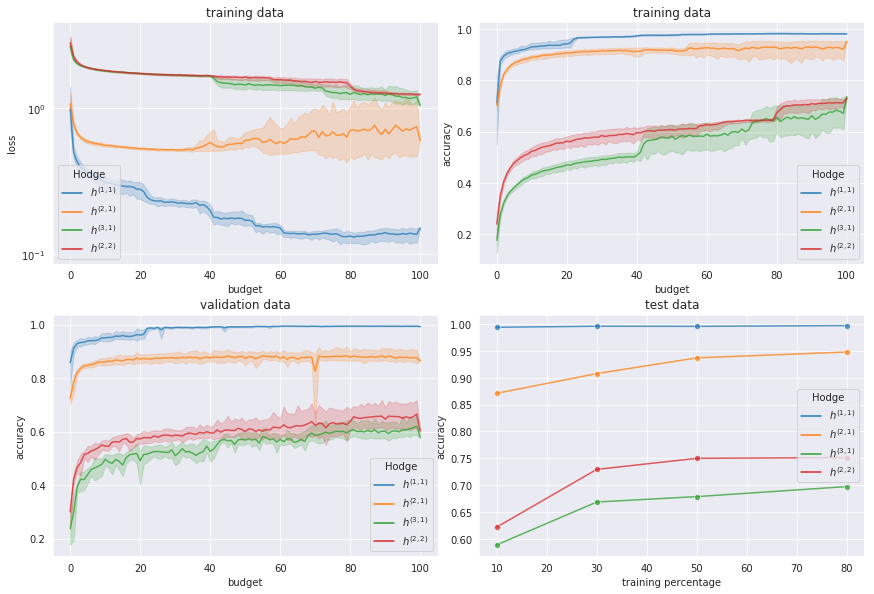

In [8]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(12,8))
fig.tight_layout(h_pad=3)
ax1.set_title("training data")
sns.lineplot(x='budget', y='loss', data=hist_data2, alpha=0.75, ax=ax1, hue="Hodge", ci=100)
ax1.set(yscale='log')
ax1.set_ylim([0.9*np.min(hist_data2['loss']), 1.1*np.max(hist_data2['loss'])])

ax2.set_title("training data")
sns.lineplot(x='budget', y='accuracy', data=hist_data2, alpha=0.75, ax=ax2, hue="Hodge", ci=100)

ax3.set_title("validation data")
sns.lineplot(x='budget', y='val_accuracy', data=hist_data2, alpha=0.75, ax=ax3, hue="Hodge", ci=100)
ax3.set_ylabel("accuracy")

ax4.set_title("test data")
sns.lineplot(x='train_ratio', y='best test accuracy_1', data=test_data, alpha=0.75, ax=ax4, hue="Hodge", marker='o')
ax4.set_ylabel("accuracy")
ax4.set_xlabel("training percentage")

plt.savefig('accuracies.pdf', bbox_inches="tight")
plt.savefig('accuracies.png', bbox_inches="tight")

print best test accuracies

In [9]:
for e in h:
    print(e)
    print(test_data[test_data['Hodge'] == e[:-1]])
    print(e+'mean')
    print(np.mean(test_data[test_data['Hodge'] == e[:-1]]))

$h^{(1,1)}$-
   best validation accuracy_0  best test accuracy_0  best test loss_0  \
0                    0.993298              0.993098          0.127353   
1                    0.994512              0.994656          0.081161   
2                    0.996058              0.995664          0.073036   
3                    0.997803              0.997416          0.074303   

   best validation loss_0  best validation accuracy_1  best test accuracy_1  \
0                0.117576                    0.994192              0.994318   
1                0.077592                    0.995915              0.996233   
2                0.068882                    0.996323              0.996028   
3                0.056167                    0.997814              0.997516   

   best test loss_1  best validation loss_1        Hodge  train_ratio  
0          0.149427                0.129483  $h^{(1,1)}$           10  
1          0.097040                0.088937  $h^{(1,1)}$           30  
2        